In [2]:
import MDAnalysis

In [4]:
print [x for x in dir(MDAnalysis) if not x.startswith('__')]

['ApplicationError', 'ConversionWarning', 'FileFormatWarning', 'FinishTimeException', 'FormatError', 'Merge', 'MissingDataWarning', 'NoDataError', 'NullHandler', 'SelectionError', 'SelectionWarning', 'StreamWarning', 'Timeseries', 'Universe', 'Writer', 'asUniverse', 'collection', 'coordinates', 'core', 'logging', 'start_logging', 'stop_logging', 'topology']


## Basic

In [5]:
import MDAnalysis
from MDAnalysis.tests.datafiles import PSF, DCD
u = MDAnalysis.Universe(PSF, DCD)
print(u)

<Universe with 3341 atoms and 3365 bonds>


In [6]:
list(u.atoms[:5])

[<Atom 1: N of type 56 of resname MET, resid 1 and segid 4AKE>,
 <Atom 2: HT1 of type 2 of resname MET, resid 1 and segid 4AKE>,
 <Atom 3: HT2 of type 2 of resname MET, resid 1 and segid 4AKE>,
 <Atom 4: HT3 of type 2 of resname MET, resid 1 and segid 4AKE>,
 <Atom 5: CA of type 22 of resname MET, resid 1 and segid 4AKE>]

In [7]:
u.atoms[100:130].residues

<ResidueGroup [<Residue LEU, 6>, <Residue GLY, 7>, <Residue ALA, 8>]>

In [15]:
protein = u.selectAtoms("protein")
print [x for x in dir(protein) if not x.startswith("__") ]

['_AtomGroup__atoms', '_AtomGroup__ts', '_atomcache_size', '_atoms', '_cache', '_clear_caches', '_cls', '_container', '_containername', '_fill_cache', '_rebuild_caches', '_set_atoms', '_set_attribute', 'align_principalAxis', 'angle', 'angles', 'asphericity', 'atoms', 'bbox', 'bfactors', 'bond', 'bonds', 'bsphere', 'centerOfGeometry', 'centerOfMass', 'centroid', 'charges', 'coordinates', 'dihedral', 'dimensions', 'forces', 'fragments', 'get_forces', 'get_positions', 'get_velocities', 'improper', 'impropers', 'indices', 'masses', 'momentOfInertia', 'names', 'numberOfAtoms', 'numberOfResidues', 'numberOfSegments', 'packIntoBox', 'positions', 'principalAxes', 'radii', 'radiusOfGyration', 'resids', 'residues', 'resnames', 'resnums', 'rotate', 'rotateby', 'segids', 'segments', 'selectAtoms', 'sequence', 'set', 'set_bfactor', 'set_charge', 'set_forces', 'set_mass', 'set_name', 'set_positions', 'set_radius', 'set_resid', 'set_resname', 'set_resnum', 'set_segid', 'set_type', 'set_velocities', '

In [8]:
u.atoms.segments

<SegmentGroup [<Segment 4AKE>]>

In [9]:
r = u.atoms[100:130].residues

In [10]:
resnames = u.atoms[999:1300].resnames()
resids = u.atoms[999:1300].resids()
zip(resnames, resids)

[('LEU', 67),
 ('VAL', 68),
 ('LYS', 69),
 ('GLU', 70),
 ('ARG', 71),
 ('ILE', 72),
 ('ALA', 73),
 ('GLN', 74),
 ('GLU', 75),
 ('ASP', 76),
 ('CYS', 77),
 ('ARG', 78),
 ('ASN', 79),
 ('GLY', 80),
 ('PHE', 81),
 ('LEU', 82),
 ('LEU', 83),
 ('ASP', 84),
 ('GLY', 85),
 ('PHE', 86)]

In [11]:
r100 = u.atoms.residues[99]
print(r100.id, r100.name)

(100, 'GLY')


In [12]:
s1 = u.segments[0]
print s1.id

4AKE


In [13]:
CA = u.selectAtoms("protein and name CA")
acidic = CA.selectAtoms("resname ASP or resname GLU")
print acidic.residues

<ResidueGroup [<Residue GLU, 22>, <Residue ASP, 33>, <Residue GLU, 44>, <Residue ASP, 51>, <Residue ASP, 54>, <Residue ASP, 61>, <Residue GLU, 62>, <Residue GLU, 70>, <Residue GLU, 75>, <Residue ASP, 76>, <Residue ASP, 84>, <Residue ASP, 94>, <Residue GLU, 98>, <Residue ASP, 104>, <Residue GLU, 108>, <Residue ASP, 110>, <Residue ASP, 113>, <Residue GLU, 114>, <Residue ASP, 118>, <Residue GLU, 143>, <Residue ASP, 146>, <Residue ASP, 147>, <Residue GLU, 151>, <Residue GLU, 152>, <Residue ASP, 158>, <Residue ASP, 159>, <Residue GLU, 161>, <Residue GLU, 162>, <Residue GLU, 170>, <Residue GLU, 185>, <Residue GLU, 187>, <Residue ASP, 197>, <Residue GLU, 204>, <Residue ASP, 208>, <Residue GLU, 210>]>


## Grupos de átomos

In [18]:
CA = u.selectAtoms("protein and name CA")
r = CA.positions
r.shape

(214, 3)

In [21]:
domains = {
'CORE': u.selectAtoms("protein and (resid 1-29 or resid 60-121 or resid 160-214)"),
'NMP': u.selectAtoms("protein and resid 30-59"),
'LID': u.selectAtoms("protein and resid 122-159")
}

cg = dict((name, dom.centroid()) for name,dom in domains.items())
cm = dict((name, dom.centerOfMass()) for name,dom in domains.items())
import pprint
pprint.pprint(cg)
pprint.pprint(cm)

{'CORE': array([ 4.43884087,  2.05389476,  1.63895261], dtype=float32),
 'LID': array([-15.16074944,   2.11599636,  -4.37305355], dtype=float32),
 'NMP': array([ -2.99990702, -13.62531662,  -2.93235731], dtype=float32)}
{'CORE': array([ 4.564116  ,  2.08700105,  1.54992649]),
 'LID': array([-15.11337499,   2.12292226,  -4.40910485]),
 'NMP': array([ -3.20330174, -13.60247613,  -3.06221538])}


In [23]:
#Distancias
from numpy.linalg import norm
print(norm(cm['CORE'] - cm['NMP']))
print(norm(cm['CORE'] - cm['LID']))
print(norm(cm['NMP'] - cm['LID']))

18.1042626244
20.5600339602
19.7725089609


In [24]:
print(norm(cg['CORE'] - cg['NMP']))
print(norm(cg['CORE'] - cg['LID']))
print(norm(cg['NMP'] - cg['LID']))

17.9463
20.501
19.9437


In [25]:
import numpy as np
from numpy.linalg import norm

def theta_NMP(u):
    """Calculate the NMP-CORE angle for E. coli AdK in degrees"""
    C = u.selectAtoms("resid 115:125 and (backbone or name CB)").centerOfGeometry()
    B = u.selectAtoms("resid 90:100 and (backbone or name CB)").centerOfGeometry()
    A = u.selectAtoms("resid 35:55 and (backbone or name CB)").centerOfGeometry()
    BA = A - B
    BC = C - B
    theta = np.arccos(np.dot(BA, BC)/(norm(BA)*norm(BC)))
    return np.rad2deg(theta)

def theta_LID(u):
    """Calculate the LID-CORE angle for E. coli AdK in degrees"""
    C = u.selectAtoms("resid 179:185 and (backbone or name CB)").centerOfGeometry()
    B = u.selectAtoms("resid 115:125 and (backbone or name CB)").centerOfGeometry()
    A = u.selectAtoms("resid 125:153 and (backbone or name CB)").centerOfGeometry()
    BA = A - B
    BC = C - B
    theta = np.arccos(np.dot(BA, BC)/(norm(BA)*norm(BC)))
    return np.rad2deg(theta)

In [26]:
CORE = u.selectAtoms("resid 1:29 or resid 60:121 or resid 160:214")
CORE.write("AdK_CORE.pdb")

In [ ]:
u.selectAtoms("byres (name OW and around 4.0 protein)").write("hydration_shell.pdb")

In [ ]:
#Gromacs format
CORE.write_selection("CORE.ndx", name="CORE")

## Trajectory analysis

In [27]:
len(u.trajectory)

98

In [28]:
for ts in u.trajectory:
    print("Frame: %5d, Time: %8.3f ps" % (ts.frame, u.trajectory.time))
    print("Rgyr: %g A" % (u.atoms.radiusOfGyration(), ))

Frame:     1, Time:    1.000 ps
Rgyr: 16.669 A
Frame:     2, Time:    2.000 ps
Rgyr: 16.6732 A
Frame:     3, Time:    3.000 ps
Rgyr: 16.7315 A
Frame:     4, Time:    4.000 ps
Rgyr: 16.7223 A
Frame:     5, Time:    5.000 ps
Rgyr: 16.744 A
Frame:     6, Time:    6.000 ps
Rgyr: 16.7185 A
Frame:     7, Time:    7.000 ps
Rgyr: 16.7741 A
Frame:     8, Time:    8.000 ps
Rgyr: 16.7764 A
Frame:     9, Time:    9.000 ps
Rgyr: 16.7894 A
Frame:    10, Time:   10.000 ps
Rgyr: 16.8289 A
Frame:    11, Time:   11.000 ps
Rgyr: 16.8521 A
Frame:    12, Time:   12.000 ps
Rgyr: 16.8549 A
Frame:    13, Time:   13.000 ps
Rgyr: 16.8723 A
Frame:    14, Time:   14.000 ps
Rgyr: 16.9108 A
Frame:    15, Time:   15.000 ps
Rgyr: 16.9494 A
Frame:    16, Time:   16.000 ps
Rgyr: 16.981 A
Frame:    17, Time:   17.000 ps
Rgyr: 17.0033 A
Frame:    18, Time:   18.000 ps
Rgyr: 17.0196 A
Frame:    19, Time:   19.000 ps
Rgyr: 17.0784 A
Frame:    20, Time:   20.000 ps
Rgyr: 17.1265 A
Frame:    21, Time:   21.000 ps
Rgyr: 17.14

In [29]:
Rgyr = []
protein = u.selectAtoms("protein")
for ts in u.trajectory:
   Rgyr.append((u.trajectory.time, protein.radiusOfGyration()))
Rgyr = np.array(Rgyr)

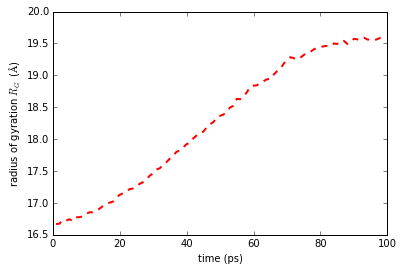

In [30]:
# quick plot
import matplotlib.pyplot as plt
ax = plt.subplot(111)
ax.plot(Rgyr[:,0], Rgyr[:,1], 'r--', lw=2, label=r"$R_G$")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"radius of gyration $R_G$ ($\AA$)")
ax.figure.savefig("Rgyr.pdf")
plt.draw()

## Functions

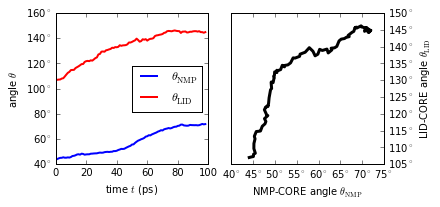

In [3]:
import numpy as np
from numpy.linalg import norm

def theta_NMP(u):
    """Calculate the NMP-CORE angle for E. coli AdK in degrees"""
    C = u.selectAtoms("resid 115:125 and (backbone or name CB)").centerOfGeometry()
    B = u.selectAtoms("resid 90:100 and (backbone or name CB)").centerOfGeometry()
    A = u.selectAtoms("resid 35:55 and (backbone or name CB)").centerOfGeometry()
    BA = A - B
    BC = C - B
    theta = np.arccos(np.dot(BA, BC)/(norm(BA)*norm(BC)))
    return np.rad2deg(theta)

def theta_LID(u):
    """Calculate the LID-CORE angle for E. coli AdK in degrees"""
    C = u.selectAtoms("resid 179:185 and (backbone or name CB)").centerOfGeometry()
    B = u.selectAtoms("resid 115:125 and (backbone or name CB)").centerOfGeometry()
    A = u.selectAtoms("resid 125:153 and (backbone or name CB)").centerOfGeometry()
    BA = A - B
    BC = C - B
    theta = np.arccos(np.dot(BA, BC)/(norm(BA)*norm(BC)))
    return np.rad2deg(theta)

if __name__ == "__main__":
    import MDAnalysis
    from MDAnalysis.tests.datafiles import PSF, DCD
    import matplotlib
    import matplotlib.pyplot as plt

    u = MDAnalysis.Universe(PSF, DCD)
    data = np.array([(u.trajectory.time, theta_NMP(u), theta_LID(u)) for ts in u.trajectory])
    time, NMP, LID = data.T


    # plotting
    degreeFormatter = matplotlib.ticker.FormatStrFormatter(r"%g$^\circ$")
    fig = plt.figure(figsize=(6,3))

    ax1 = fig.add_subplot(121)
    ax1.plot(time, NMP, 'b-', lw=2, label=r"$\theta_{\mathrm{NMP}}$")
    ax1.plot(time, LID, 'r-', lw=2, label=r"$\theta_{\mathrm{LID}}$")
    ax1.set_xlabel(r"time $t$ (ps)")
    ax1.set_ylabel(r"angle $\theta$")
    ax1.yaxis.set_major_formatter(degreeFormatter)
    ax1.legend(loc="best")

    ax2 = fig.add_subplot(122)
    ax2.plot(NMP, LID, 'k-', lw=3)
    ax2.set_xlabel(r"NMP-CORE angle $\theta_{\mathrm{NMP}}$")
    ax2.set_ylabel(r"LID-CORE angle $\theta_{\mathrm{LID}}$")
    ax2.xaxis.set_major_formatter(degreeFormatter)
    ax2.yaxis.set_major_formatter(degreeFormatter)
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")

    fig.subplots_adjust(left=0.12, right=0.88, bottom=0.2, wspace=0.15)

    for ext in ('svg', 'pdf', 'png'):
        fig.savefig("NMP_LID_anglMDAe_projection.{0}".format(ext))

## Trucos 

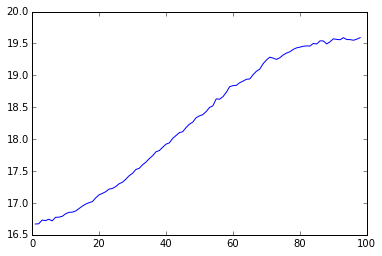

In [31]:
protein = u.selectAtoms("protein")
data = np.array([(u.trajectory.time, protein.radiusOfGyration()) for ts in u.trajectory])
time, RG = data.T
plot(time, RG)

Not all trajectory readers support direct access and arbitrary slices, although many commonly ones such as DCD, XTC/TRR, and Amber NETCDF do.

In [32]:
for ts in u.trajectory[9:-10:5]:
    print(ts.frame)

10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85


## Writing coordinates

MDAnalysis also supports writing of data in a range of file formats (see the Table of supported coordinate formats for details). MDAnalysis supports both single frame writers (such as a simple PDB or GRO file) and trajectory writers (e.g. XTC, DCD, but also multi-frame PDB files).

In [34]:
import MDAnalysis
from MDAnalysis.tests.datafiles import PDB, XTC

u = MDAnalysis.Universe(PDB, XTC)
protein = u.selectAtoms("protein")
with MDAnalysis.Writer("protein.xtc", protein.numberOfAtoms()) as W:
    for ts in u.trajectory:
        W.write(protein)

In [35]:
# project a dynamic property on the structure using the B-factor field

import numpy as np
import MDAnalysis
import MDAnalysis.analysis.align

from MDAnalysis.tests.datafiles import PSF, DCD


u = MDAnalysis.Universe(PSF, DCD)
ref = MDAnalysis.Universe(PSF, DCD)  # copy of u

CORE_selection = "resid 1:29 or resid 60:121 or resid 160:214"
pdbtrj = "adk_distance_bfac.pdb"

with MDAnalysis.Writer(pdbtrj, multiframe=True, bonds=False, numatoms=u.atoms.numberOfAtoms()) as PDB:
    # reference coordinates: set to first frame
    ref.trajectory[0]
    # iterate through our trajectory
    for ts in u.trajectory:
        # superimpose on the reference CORE (at t=0)
        rmsd = MDAnalysis.analysis.align.alignto(u.atoms, ref.atoms, select=CORE_selection)
        distances = np.sqrt(np.sum((u.atoms.positions - ref.atoms.positions)**2, axis=1))
        # project displacement on structure via bfactor field
        u.atoms.set_bfactor(distances)
        PDB.write(u.atoms)
        print("Frame {0}: CORE RMSD before/after superposition: {1[0]:.1f} / {1[1]:.1f} A. "
              "min-max displacement: {2:.1f}...{3:.1f} A".format(ts.frame, rmsd, distances.min(), distances.max()))

print("Wrote PDB trajectory {0} with distances in bfactor field".format(pdbtrj))

Frame 1: CORE RMSD before/after superposition: 0.0 / 0.0 A. min-max displacement: 0.0...0.0 A
Frame 2: CORE RMSD before/after superposition: 0.7 / 0.7 A. min-max displacement: 0.0...3.5 A
Frame 3: CORE RMSD before/after superposition: 0.8 / 0.8 A. min-max displacement: 0.0...3.6 A
Frame 4: CORE RMSD before/after superposition: 1.0 / 1.0 A. min-max displacement: 0.0...4.2 A
Frame 5: CORE RMSD before/after superposition: 1.0 / 1.0 A. min-max displacement: 0.0...4.7 A
Frame 6: CORE RMSD before/after superposition: 1.1 / 1.1 A. min-max displacement: 0.0...6.3 A
Frame 7: CORE RMSD before/after superposition: 1.2 / 1.1 A. min-max displacement: 0.1...6.4 A
Frame 8: CORE RMSD before/after superposition: 1.2 / 1.2 A. min-max displacement: 0.1...7.2 A
Frame 9: CORE RMSD before/after superposition: 1.3 / 1.2 A. min-max displacement: 0.1...7.3 A
Frame 10: CORE RMSD before/after superposition: 1.3 / 1.3 A. min-max displacement: 0.0...6.6 A
Frame 11: CORE RMSD before/after superposition: 1.3 / 1.3 A

/Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysis/analysis/align.py:215: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  b.shape[0], rot, weights)


In [ ]:
# load multi-frame pdb file, storing B factors from each frame in user.
# usage: pdbbfactor <filename>
# url: http://www.ks.uiuc.edu/Research/vmd/script_library/scripts/pdbbfactor/
#
# Justin Gullingsrud
# 3 September 2004
#
# Oliver Beckstein, 2014-10-30
# updated for use with standard multipdb files which use ENDMDL as separators
# (END --> ENDM)

proc pdbbfactor { fname } {
  mol new $fname waitfor all
  set all [atomselect top all]
  set frame 0
  set in [open $fname r]
  set beta {}
  while { [gets $in line] != -1 } {
    switch -- [string range $line 0 3] {
      ENDM {
        $all frame $frame
        $all set user $beta
        set beta {}
        incr frame
      }
      default {
        lappend beta $line
      }
    }
  }
}

In [ ]:
# project a dynamic property on the structure in VMD using the User field

import numpy as np
import MDAnalysis
import MDAnalysis.analysis.align

from MDAnalysis.tests.datafiles import PSF, DCD


u = MDAnalysis.Universe(PSF, DCD)
ref = MDAnalysis.Universe(PSF, DCD)  # copy of u

CORE_selection = "resid 1:29 or resid 60:121 or resid 160:214"
userdata = "adk_distance.dat"
vmdscript = "adk_distance.vmd"

timeseries = []

# reference coordinates: set to first frame
ref.trajectory[0]
# iterate through our trajectory
for ts in u.trajectory:
    # superimpose on the reference CORE (at t=0)
    rmsd = MDAnalysis.analysis.align.alignto(u.atoms, ref.atoms, select=CORE_selection)
    distances = np.sqrt(np.sum((u.atoms.positions - ref.atoms.positions)**2, axis=1))
    timeseries.append(distances)

    print("Frame {0}: CORE RMSD before/after superposition: {1[0]:.1f} / {1[1]:.1f} A. "
          "min-max displacement: {2:.1f}...{3:.1f} A".format(ts.frame, rmsd, distances.min(), distances.max()))

# serialize: add a marker 'END' after each frame
marker = 'END'
with open(userdata, 'w') as data:
    for distances in timeseries:
        data.write("\n".join([str(x) for x in distances]))
        data.write("\n{0}\n".format(marker))

# write VMD loader script
parameters = {'datafile': userdata,
              'topology': PSF,
              'trajectory': DCD}

script = """\
proc loaduserdata { fname } {
    set all [atomselect top all]
    set frame 0
    set data [open $fname r]
    while { [gets $data line] != -1 } {
        set value [string trim $line]
        switch -- [string range $value 0 2] {
            END {
                $all frame $frame
                $all set user $beta
                set beta {}
                incr frame
            }
            default {
                lappend beta $line
            }
        }
    }
}
""" + """
mol new "{0[topology]}"
mol addfile "{0[trajectory]}" waitfor all
loaduserdata "{0[datafile]}"
mol modcolor 0 top User
mol modstyle 0 top VDW

""".format(parameters)

with open(vmdscript, 'w') as tcl:
    tcl.write(script+'\n')

print("Wrote data trajectory {0} with distances".format(userdata))
print("Wrote VMD script {0}: 'source {0}' to load everything ".format(vmdscript))

## MD Analysis

In [36]:
#RMSD
import MDAnalysis.analysis.rms
u = MDAnalysis.Universe(PSF, DCD)
bb = u.selectAtoms('backbone')
A = bb.positions  # coordinates of first frame
u.trajectory[-1]      # forward to last frame
B = bb.positions  # coordinates of last frame
MDAnalysis.analysis.rms.rmsd(A,B)

6.83424941291698

In [37]:
#Superposition
import MDAnalysis
from MDAnalysis.analysis import align
from MDAnalysis.tests.datafiles import PSF, DCD, PDB_small
ref = MDAnalysis.Universe(PDB_small)
mobile = MDAnalysis.Universe(PSF,DCD)
align.rmsd(mobile.atoms.CA.positions, ref.atoms.CA.positions)

18.858259026820352

In [38]:
ref0 =  ref.atoms.CA.positions - ref.atoms.CA.centerOfMass()
mobile0 =  mobile.atoms.CA.positions - mobile.atoms.CA.centerOfMass()
align.rmsd(mobile0, ref0)

6.809396586471805

In [40]:
R, rmsd = align.rotation_matrix(mobile0, ref0)
print R, rmsd

[[ 0.14514539 -0.27259113  0.95111876]
 [ 0.88652593  0.46267112 -0.00268642]
 [-0.43932289  0.84358136  0.30881368]] 6.80939658647


In [41]:
mobile.atoms.translate(-mobile.atoms.CA.centerOfMass())
mobile.atoms.rotate(R)
mobile.atoms.translate(ref.atoms.CA.centerOfMass())
mobile.atoms.write("mobile_on_ref.pdb")

In [42]:
NMP = u.selectAtoms("resid 30:59")
u.trajectory[0]   # make sure to be on initial frame
ref_com = NMP.selectAtoms("name CA").centerOfMass()
ref0 = NMP.positions - ref_com

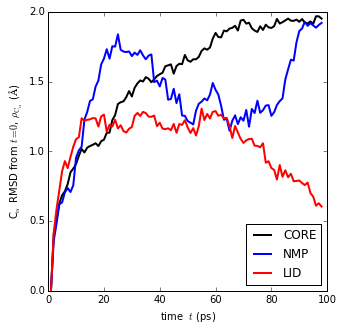

In [43]:
import numpy as np
from MDAnalysis.analysis.align import rotation_matrix
from MDAnalysis.core.qcprot import CalcRMSDRotationalMatrix

def superpose(mobile, xref0, xref_com=None):
    """Superpose the AtomGroup *mobile* onto the coordinates *xref0* centered at the orgin.

    The original center of mass of the reference group *xref_com* must
    be supplied or the superposition is done at the origin of the
    coordinate system.
    """
    # 995 us
    xref_com = xref_com if xref_com is not None else np.array([0., 0., 0.])
    xmobile0 = mobile.positions - mobile.centerOfMass()
    R, rmsd = rotation_matrix(xmobile0, xref0)
    mobile.rotate(R)
    mobile.translate(xref_com)
    return rmsd

def rmsd(mobile, xref0):
    """Calculate optimal RMSD for AtomGroup *mobile* onto the coordinates *xref0* centered at the orgin.

    The coordinates are not changed. No mass weighting.
    """
    # 738 us
    xmobile0 = mobile.positions - mobile.centerOfMass()
    return CalcRMSDRotationalMatrix(xref0.T.astype(np.float64), xmobile0.T.astype(np.float64), mobile.numberOfAtoms(), None, None)


if __name__ == "__main__":
    import MDAnalysis
    import matplotlib
    import matplotlib.pyplot as plt

    # load AdK DIMS trajectory
    from MDAnalysis.tests.datafiles import PSF, DCD
    u = MDAnalysis.Universe(PSF, DCD)

    # one AtomGroup per domain
    domains = {
        'CORE': u.selectAtoms("(resid 1:29 or resid 60:121 or resid 160:214) and name CA"),
        'LID': u.selectAtoms("resid 122-159 and name CA"),
        'NMP': u.selectAtoms("resid 30-59 and name CA"),
        }
    colors = {'CORE': 'black', 'NMP': 'blue', 'LID': 'red'}

    u.trajectory[0]   # rewind trajectory
    xref0 = dict((name, g.positions - g.centerOfMass()) for name,g in domains.iteritems())

    nframes = len(u.trajectory)
    results = dict((name, np.zeros((nframes, 2), dtype=np.float64)) for name in domains)

    for iframe,ts in enumerate(u.trajectory):
        for name, g in domains.iteritems():
            results[name][iframe, :] = u.trajectory.time, rmsd(g, xref0[name])


    # plot
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    for name in "CORE", "NMP", "LID":
        data = results[name]
        ax.plot(data[:,0], data[:,1], linestyle="-", color=colors[name], lw=2, label=name)
    ax.legend(loc="best")
    ax.set_xlabel(r"time  $t$ (ps)")
    ax.set_ylabel(r"C$_\alpha$ RMSD from $t=0$, $\rho_{\mathrm{C}_\alpha}$ ($\AA$)")

    for ext in ('svg', 'pdf', 'png'):
        fig.savefig("AdK_domain_rigidity.{0}".format(ext))

In [ ]:
https://code.google.com/p/mdanalysis/source/browse/#git%2Fpackage%2Fexamples

In [44]:
#!/usr/bin/python
#GNM Ejemplo
import sys,os
import MDAnalysis
import MDAnalysis.analysis.gnm
from MDAnalysis.tests.datafiles import PSF, DCD

u = MDAnalysis.Universe(PSF,DCD)
C = MDAnalysis.analysis.gnm.GNMAnalysis(u,ReportVector="output.txt")

C.run()
output = zip(*C.results)

outputfile = open("eigenvalues.dat","w")
for item in output[1]: print >> outputfile, item
outputfile.close()

In [ ]:
#!/usr/bin/env python

"""
MDAnalysis example: Convert Amber formatted trajectory to DCD
=============================================================

This example shows how one can use MDAnalysis to convert between
different trajectory formats.

"""

#from MDAnalysis.tests.datafiles import PRMpbc,TRJpbc_bz2
from MDAnalysis.tests.datafiles import PRM,TRJ_bz2
from MDAnalysis import Universe, Writer
from MDAnalysis.core.util import greedy_splitext

import os.path

topol = PRM #PRMpbc
intrj = TRJ_bz2 #TRJpbc_bz2
ext = '.dcd'   # output format determined by extension

root, oldext = greedy_splitext(os.path.basename(intrj))
outtrj = root + ext
outpdb = root + '.pdb'

u = Universe(topol, intrj)

# create a writer instance for the output trajectory
w = Writer(outtrj, u.trajectory.numatoms)

# loop through the trajectory and write a frame for every step
for ts in u.trajectory:
    w.write(ts)
    print "Converted frame %d" % ts.frame
w.close_trajectory()
print "Converted %r --> %r" % (intrj, outtrj)

# make a pdb file as a simple 'topology'
u.trajectory.rewind()
u.atoms.write(outpdb)
print "Created %r to be used with the trajectory" % outpdb

Processing residue 2
Processing residue 3
Processing residue 4
Processing residue 5
Processing residue 6
Processing residue 7
Processing residue 8
Processing residue 9
Processing residue 10
Processing residue 11
Processing residue 12
Processing residue 13
Processing residue 14
Processing residue 15
Processing residue 16
Processing residue 17
Processing residue 18
Processing residue 19
Processing residue 20
Processing residue 21
Processing residue 22
Processing residue 23
Processing residue 24
Processing residue 25
Processing residue 26
Processing residue 27
Processing residue 28
Processing residue 29
Processing residue 30
Processing residue 31
Processing residue 32
Processing residue 33
Processing residue 34
Processing residue 35
Processing residue 36
Processing residue 37
Processing residue 38
Processing residue 39
Processing residue 40
Processing residue 41
Processing residue 42
Processing residue 43
Processing residue 44
Processing residue 45
Processing residue 46
Processing residue

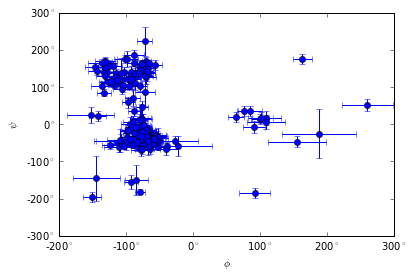

In [48]:
#!/usr/bin/env python

"""
MDAnalysis example: backbone dihedrals
======================================

Calculating backbone dihedrals of a protein, using timeseries functionality


"""

import numpy

from MDAnalysis import Universe, collection, Timeseries
from MDAnalysis.tests.datafiles import PSF, DCD

try:
    import matplotlib
    matplotlib.use('agg')  # no interactive plotting, only save figures
    from pylab import errorbar, legend, xlabel, ylabel, savefig, clf, gca, draw
    have_matplotlib = True
except ImportError:
    have_matplotlib = False


universe = Universe(PSF, DCD)
protein = universe.selectAtoms("protein")

numresidues = protein.numberOfResidues()

collection.clear()
for res in range(2, numresidues-1):
    print "Processing residue %d" % res
    #  selection of the atoms involved for the phi for resid '%d' %res
    ## selectAtoms("atom 4AKE %d C"%(res-1), "atom 4AKE %d N"%res, "atom %d 4AKE CA"%res, "atom 4AKE %d C" % res)
    phi_sel = universe.residues[res].phi_selection()

    #  selection of the atoms involved for the psi for resid '%d' %res
    psi_sel = universe.residues[res].psi_selection()

    # collect the timeseries of a dihedral
    collection.addTimeseries(Timeseries.Dihedral(phi_sel))
    collection.addTimeseries(Timeseries.Dihedral(psi_sel))

# iterate through trajectory and compute (see docs for start/stop/skip options)
collection.compute(universe.trajectory)

# finding the avg and stdev for each residue
phi = []
psi = []
for data_phi in collection[0::2]:
    dih = numpy.rad2deg(data_phi[0])
    phi.append([dih.mean(), dih.std()])
for data_psi in collection[1::2]:
    dih = numpy.rad2deg(data_psi[0])
    psi.append([dih.mean(), dih.std()])

# making an array for phi and psi data
res = numpy.arange(2, numresidues-1)
phi = numpy.array(phi)
psi = numpy.array(psi)

# plotting and saving the dihe for each resid
if have_matplotlib:
    clf()
    a = errorbar(res, phi[:,0], phi[:,1], fmt='ro', label=r"$\phi$")
    b = errorbar(res, psi[:,0], psi[:,1], fmt='bs', label=r"$\psi$")
    legend((a[0], b[0]), (r"$\phi$", r"$\psi$"))
    xlabel("residue number")
    ylabel(r"dihedral in degrees")
    savefig("backbone_dihedrals_residue.pdf")
    savefig("backbone_dihedrals_residue.png")
    print "Figures saved as backbone_dihedrals_residue.{pdf,png}"

    # Ramachandran plot
    clf()
    errorbar(phi[:,0], psi[:,0], xerr=phi[:,1], yerr=psi[:,1], fmt="o")
    xlabel(r"$\phi$")
    ylabel(r"$\psi$")
    ax = gca()
    degreeFormatter = matplotlib.ticker.FormatStrFormatter(r'%d$^\circ$')
    ax.xaxis.set_major_formatter(degreeFormatter)
    ax.yaxis.set_major_formatter(degreeFormatter)
    draw()

    savefig("backbone_dihedrals_ramachandran.pdf")
    savefig("backbone_dihedrals_ramachandran.png")
    print "Figures saved as backbone_dihedrals_ramachandran.{pdf,png}"

Wrote blocks.{pdf,png}


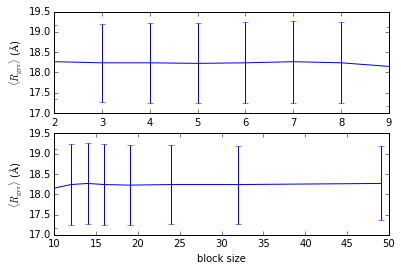

In [50]:
#!/usr/bin/env python

"""
MDAnalysis example: Simple blocking analysis
============================================

Calculate the radius of gyration for increasing number of blocks over
a trajectory.

See: H. Flyvbjerg and H. G. Petersen. Error estimates on averages of
correlated data. 91(1):461-466, 1989.

"""

import numpy
import MDAnalysis

def blocked(universe, nblocks, analyze):
    size = universe.trajectory.numframes/nblocks
    blocks = []
    for block in xrange(nblocks):
        a = []
        for ts in u.trajectory[block*size:(block+1)*size]:
            a.append(analyze(universe))
        blocks.append(numpy.average(a))
    blockaverage = numpy.average(blocks)
    blockstd = numpy.std(blocks)

    return nblocks, size, blockaverage, blockstd

def rgyr(universe):
    return universe.selectAtoms('protein').radiusOfGyration()


if __name__ == "__main__":
    from  MDAnalysis.tests.datafiles import PSF,DCD
    try:
        import matplotlib
        matplotlib.use('agg')  # no interactive plotting, only save figures
        from pylab import errorbar, subplot, xlabel, ylabel, savefig
        have_matplotlib = True
    except ImportError:
        have_matplotlib = False

    u = MDAnalysis.Universe(PSF,DCD)
    results = []
    for nblocks in xrange(2,10):
        results.append(blocked(u, nblocks, rgyr))
    r = numpy.array(results)

    if have_matplotlib:
        subplot(211)
        errorbar(r[:,0], r[:,2], yerr=r[:,3])
        xlabel("number of blocks")
        ylabel(r"$\langle R_{\rm{gyr}} \rangle$ ($\AA$)")

        subplot(212)
        errorbar(r[:,1], r[:,2], yerr=r[:,3])
        xlabel("block size")
        ylabel(r"$\langle R_{\rm{gyr}} \rangle$ ($\AA$)")

        savefig("blocks.pdf")
        savefig("blocks.png")

        print "Wrote blocks.{pdf,png}" % vars()

In [51]:
#!/usr/bin/env python

"""
MDAnalysis example: Convert DCD trajectory into XTC
===================================================

This example shows how one can use MDAnalysis to convert between
different trajectory formats.

"""

from MDAnalysis.tests.datafiles import PDB_small, DCD
from MDAnalysis import Universe, Writer


import os.path

root, ext = os.path.splitext(os.path.basename(DCD))
xtcname = root + '.xtc'  # output format determined by extension

u = Universe(PDB_small, DCD)

# create a writer instance for the output trajectory
w = Writer(xtcname, u.trajectory.numatoms)

# loop through the trajectory and write a frame for every step
for ts in u.trajectory:
    w.write(ts)
    print "Converted frame %d" % ts.frame
w.close_trajectory()
print "Converted %r --> %r" % (DCD, xtcname)


Converted frame 1
Converted frame 2
Converted frame 3
Converted frame 4
Converted frame 5
Converted frame 6
Converted frame 7
Converted frame 8
Converted frame 9
Converted frame 10
Converted frame 11
Converted frame 12
Converted frame 13
Converted frame 14
Converted frame 15
Converted frame 16
Converted frame 17
Converted frame 18
Converted frame 19
Converted frame 20
Converted frame 21
Converted frame 22
Converted frame 23
Converted frame 24
Converted frame 25
Converted frame 26
Converted frame 27
Converted frame 28
Converted frame 29
Converted frame 30
Converted frame 31
Converted frame 32
Converted frame 33
Converted frame 34
Converted frame 35
Converted frame 36
Converted frame 37
Converted frame 38
Converted frame 39
Converted frame 40
Converted frame 41
Converted frame 42
Converted frame 43
Converted frame 44
Converted frame 45
Converted frame 46
Converted frame 47
Converted frame 48
Converted frame 49
Converted frame 50
Converted frame 51
Converted frame 52
Converted frame 53
Co

In [52]:
import numpy
from MDAnalysis import *
"""
Lipid order parameters
"""
universe = Universe(...)

tail_carbons = arange(2,15)

skip = 5
order_param = numpy.zeros(len(tail_carbons))

for i, carbon in enumerate(tail_carbons):
    selection = "resname DMPC and ( name C2%d or name H%dR or name H%dS or name C3%d or name H%dX or name H%dY )" % ((carbon,)*6)
    group = universe.selectAtoms(selection)

    data = universe.dcd.timeseries(group, format="afc", skip=skip)

    # There are two deuteriums/carbon atom position in each acyl chain
    cd = numpy.concatenate((data[1::3]-data[0::3], data[2::3]-data[0::3]), axis=0)
    del data
    cd_r = numpy.sqrt(numpy.sum(numpy.power(cd,2), axis=-1))

    # Dot product with the z axis
    cos_theta = cd[...,2]/cd_r
    S_cd = -0.5*(3.*numpy.square(cos_theta)-1)

    # Depending on how you want to treat each deuterium, you can skip the next step
    S_cd.shape = (S_cd.shape[0], S_cd.shape[1]/4, -1) #4 deuterium order parameters/lipid carbon position
    order_param[i] = numpy.average(S_cd)


SyntaxError: invalid syntax (<ipython-input-52-e6f9ed7846b2>, line 4)

In [54]:
#!/usr/bin/env python
# Example script, part of MDAnalysis
"""
:Author: Oliver Beckstein
:Year: 2010
:Copyright: GNU Public License v3

MDAnalysis example: Lipid bilayer composition
=============================================

Find the leaflets of a membrane system and print a breakdown of the
counts of the different residue names in each leaflet.
"""

usage = """%%prog [options] structure-file

Calculate the lipid composition in the two leaflets of the membrane
stored in *structure-file*.

The default selection string (--headgroup-selection) is suitable for
coarse-grained bilayers including phospholipids and
cholesterol. Adjust it so that it selects one atom from each head
group.
"""

import MDAnalysis
from MDAnalysis.analysis.leaflet import LeafletFinder, optimize_cutoff

import numpy

if __name__ == "__main__":
    import errno
    import os.path
    from optparse import OptionParser

    parser = OptionParser(usage=usage % vars())
    parser.add_option("-t", "--topology", dest="topology",
                      help="optional topology file e.g. PSF; useful when using "
                      "a PDB file as structure, which only provides 3-letter resnames")
    parser.add_option("--pbc", dest="pbc", action="store_true",
                      help="take periodic boundaries into account? "
                      "(Only works for orthorhombic boxes) [%default]")
    parser.add_option("-d", "--cutoff", dest="cutoff", type="float", metavar="DIST",
                      help="look for neighbouring lipids within DIST Angstroem [%default]")
    parser.add_option("-S", "--headgroup-selection", dest="selection", metavar="SELECTION",
                      help="MDAnalysis selection string that selects one atom from "
                      "each headgroup of every lipid ['%default']")
    parser.add_option("--optimize", dest="optimize", action="store_true",
                      help="find cutoff automatically that minimizes the total number "
                      "of unconnected groups but is larger than a single group. "
                      "Can take a while... Ignores --cutoff. [%default]")
    parser.add_option("--max-imbalance", dest="max_imbalance", type="float",
                      metavar="Q",
                      help="When optimizing, discard any solutions for which "
                      "|N0 - N1|/|N0 + N1| > Q (Ni = number of lipids in group i) "
                      "This heuristic picks groups with balanced numbers of lipids. "
                      "[%default]")
                     

    parser.set_defaults(pbc=False, cutoff=15.0,optimize=False,
                        max_imbalance=0.2,
                        # PO-lipids (and CHOL for CG) but not CHARMM K+
                        selection="(name P* or name ROH) and not name POT",
                        )
    # TODO: selection should be set based on the identities of lipids.
    #       combined with fingerprinting in the future to do this automagically;
    #       Hard coded for now.
   

    options, args = parser.parse_args()
   
    try:
        structure = args[0]
    except IndexError:
        raise ValueError("Need structure file (pdb, gro, ...) as input")

    if not os.path.exists(structure):
        raise IOError(errno.ENOENT, "PQR file not found", structure)

    if not options.topology:
        options.topology = structure

    u = MDAnalysis.Universe(options.topology, structure)

    if options.optimize:
        print "# Finding best cutoff (--optimize)..."
        try:
            cutoff, N = optimize_cutoff(u, options.selection, pbc=options.pbc,
                                        max_imbalance=options.max_imbalance)
        except:
            raise RuntimeError("Failed cutoff optimization, try without --optimize")
        print "# Optimized cutoff=%(cutoff).1f A, finding %(N)d disconnected groups" % vars()
    else:        
        cutoff = options.cutoff
        print "# Using fixed cutoff=%(cutoff).1f A" % vars()

    LF = LeafletFinder(u, options.selection, cutoff=cutoff, pbc=options.pbc)
   
    print "# group sizes = %r " % LF.sizes()
   
    # two leaflets
    def print_line(symbol="-"):
        print "#" + (12+5) * symbol
    print_line("=")
    print "#%2s  %5s  %6s" % ("ll", "resn", "count")
    print_line("=")

    for groupindex in xrange(len(LF.components)):
        resnames = [a.resname for a in LF.groups(groupindex)]
        # there CERTAINLY is a better way to count occurrences than this...
        keys = numpy.unique(resnames)
        for k in keys:
            count = resnames.count(k)
            print " %2d  %5s  %6d" % (groupindex,k,count)
        total = LF.sizes()[groupindex]
        if total > 1:
            print_line()
            print "#%2d  %5s  %6d" % (groupindex, '', total)
        print

Usage: -c [options] structure-file

Calculate the lipid composition in the two leaflets of the membrane
stored in *structure-file*.

The default selection string (--headgroup-selection) is suitable for
coarse-grained bilayers including phospholipids and
cholesterol. Adjust it so that it selects one atom from each head
group.


-c: error: no such option: -f


SystemExit: 2

To exit: use 'exit', 'quit', or Ctrl-D.


In [ ]:
#!/usr/bin/env python
# Example script, part of MDAnalysis
"""
:Author: Oliver Beckstein
:Year: 2010
:Copyright: GNU Public License v3

MDAnalysis example: Leaflet indentification
===========================================

Simple use of :class:`MDAnalysis.analysis.leaflet.LeafletFinder`:
finds leaflets in a membrane system and write out a selection for
visualization in VMD.

See the source for details and see ``memanal-composition.py`` for a
more sophisticated example.

LeafletFinder Algorithm
-----------------------
  1. build a graph of all phosphate distances < cutoff
  2. identify the largest connected subgraphs
  3. analyse first and second largest graph (assume they are the
     leaflets, anything else are stray micelles or individually
     floating lipids)

One could identify group 1 and 2 as upper and lower leaflet by
comparing the median of the centres of masses; this is left as an
exercise...
"""
import numpy
import MDAnalysis
from MDAnalysis.analysis.leaflet import LeafletFinder


if __name__ == "__main__":
    import sys
    try:
        PDB, selection = sys.argv[1:3]
    except ValueError:
        print "usage: leaflet.py PDB SELECTION"
        sys.exit(1)
    print "PDB=%(PDB)r selection=%(selection)r" % vars()
    L = LeafletFinder(PDB, selection)    
    print "Number of lipids in leaflets: %r" % L.sizes()
    macrovmd = PDB+".vmd"
    L.write_vmd(macrovmd)
    print "Load macros for vmd from file %r" % macrovmd
   

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# MDAnalysis example: native contact analysis (q1-q2)

"""
Example: Calculating the percentage of native contacts
======================================================

The percentag of native contacts, q, is the number of observed contacts
relative to the number of contacts in a reference state (typically, the
native state). The number of  *contacts* is the total number of unique CA atoms
within in a fixed radius of all CA atoms.

This example script takes a trajectory of AdK in which the enzyme transitions
from the closed to the open state. Two sets of native contacts are computed:

*q1*
   contacts relative to the initial (closed) state, pdb 1AKE
*q2*
   contacts relative to the final (open) state, pdb 4AKE

The trajectory was generated with the dynamic importance sampling method (DIMS)
and taken from [Beckstein2009].

The final result is stored in a bzipped data file `adk_dims_q1q2.dat.bz2` and
the q1-q2 graph is also written to `figures/nativecontacts.pdf`
(requires :mod:`matplotlib`).

[Beckstein2009] O. Beckstein, E.J. Denning, J.R. Perilla and T.B. Woolf,
                Zipping and Unzipping of Adenylate Kinase: Atomistic Insights
                into the Ensemble of Open ↔ Closed Transitions. J Mol Biol 394
                (2009), 160–176, doi:10.1016/j.jmb.2009.09.009


.. SeeAlso:: :mod:`MDAnalysis.analysis.contacts`

"""
import MDAnalysis.analysis.contacts
from MDAnalysis.tests.datafiles import PSF, DCD  # AdK example trajectory

try:
    import matplotlib
    matplotlib.use('agg')  # no interactive plotting, only save figures
    from pylab import savefig, clf
    have_matplotlib = True
except ImportError:
    have_matplotlib = False

C = MDAnalysis.analysis.contacts.ContactAnalysis(PSF, DCD, targetdir="./output")
C.run()

print "Data file was written to %r" % C.output_bz2

if have_matplotlib:
    matplotlib.rc('font', size=14)
    matplotlib.rc('figure', figsize=(3.4, 3.8))
    clf()
    C.plot(linewidth=3)

    savefig("nativecontacts.pdf")
    savefig("nativecontacts.png")

    print "Wrote figures to ./figures/nativecontacts.{pdf,png}"



In [ ]:
# potential profile along the z direction (membrane system)
#
# Reference:
#   JN Sachs, PS Crozier, TB Woolf. J Chem Phys 121 (2004), 10847
#   http://dx.doi.org/10.1063/1.1826056

from math import *
import numpy
from MDAnalysis import *

# NOTE: set TOPOLOGY and TRAJECTORY to your data: should be a membrane
#       system with the membrane normal parallel to the z-axis
universe = Universe(TOPLOGY, TRAJECTORY)
xbox, ybox, zbox = universe.trajectory.ts.dimensions[:3]

# preparing 1D z-dimension distribution variables
zmin = int(floor(-zbox/2)) # Hopefully the system is centered at the origin
zmax = int(ceil(zbox/2))
binwidth = 0.5 # Angstroms
numbins = int((zmax - zmin)/binwidth)

# setting the charges for the atoms
charge_dist = None
charges = universe.atoms.charges()

# setting the skip for the traj
universe.trajectory.skip = 10

# appending atomic charges to a particular z-dimension (z-bin)
nframes = 0
for ts in universe.trajectory:
    print ts.frame
    nframes += 1
    # Recenter z coordinates
    z = universe.atoms.coordinates()[:,2]
    z -= numpy.average(z)
    if charge_dist == None:
        charge_dist, edges = numpy.histogramdd(z, bins=numbins, range=[(zmin,zmax)], weights=charges)
    else:
        newhist, edges = numpy.histogramdd(z, bins=numbins, range=[(zmin,zmax)], weights=charges)
        charge_dist += newhist

# Normalize charge distribution
charge_dist /= nframes

# midpoints of bins
edge_1d = edges[0]
zpos = 0.5*(edge_1d[:-1]+edge_1d[1:])

# Arbitrary zero reference point
zpos -= min(zpos)

# Now integrate charge distribution twice
# (see derivation in Sachs et al paper, Eq 6)
binwidth = zbox/float(numbins)
binvolume = xbox*ybox*binwidth

sum_q_binwidth = numpy.add.accumulate(charge_dist*binwidth)
sum_z_q_binwidth = numpy.add.accumulate(zpos*charge_dist*binwidth)

phi = zpos*sum_q_binwidth - sum_z_q_binwidth

# Enforce periodic boundary and convert units to mV
pbc_factor = sum_z_q_binwidth[-1]/zbox
midpoint = 0.5*(zpos[0] + zpos[-1])     # shift by average potential at centre of the box

# converting charge distribution value to mV units
# - MDAnalysis charges are in elementary charge units
# - lengths are in Angstrom (1e-10 m)
epsilon0 = 8.854187817620e-12  # As/Vm   vacuum permittivity
e = 1.602176565e-19            # As      elementary charge
conv_phi = -e/epsilon0 * 1e3 * 1e10   # Vm -> mV Angstrom
mV = (phi + pbc_factor*midpoint)*conv_phi/binvolume

DEBUG:MDAnalysis.core.AtomGroup:Universe.load_new(): loading /Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysisTests/data/adk_oplsaa.xtc...


Start: n = 11084, size of dist = 61421986 
Frame    1
Frame    2
Frame    3
Frame    4
Frame    5
Frame    6
Frame    7
Frame    8
Frame    9
Frame   10

g(r) data written to 'rdf.dat'
Figure written to rdf.{pdf,png}


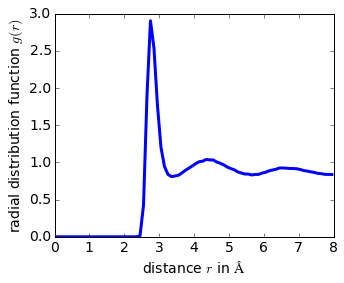

In [58]:
"""
Example: Radial distribution function g(r)
==========================================

Calculating *g(r)* (radial distribution function) of water, taking
into account periodic boundaries.

Contains a few speed-ups over the most naive implementation
 - use self_distance_array() instead of distance_array() and pre-allocate
   dist array
 - use numpy in-place operations where possible
 - use 1D histogram function (instead of e.g. histogramdd())

Profiling shows that the computational bottleneck is the
:func:`numpy.histogram` function.
"""


from itertools import izip

import numpy

from MDAnalysis import *
from MDAnalysis.core.distances import * ##distance_array
import MDAnalysis.core.units            # for bulk water density

try:
    import matplotlib
    matplotlib.use('agg')  # no interactive plotting, only save figures
    import pylab
    have_matplotlib = True
except ImportError:
    have_matplotlib = False


# very short trajectory for testing; use your own!
# NOTE: not a good example because the trajectory uses a
#       dodecahedral periodic box, which MDAnalysis does NOT
#       handle correctly at the moment!!
from MDAnalysis.tests.datafiles import GRO, XTC
universe = Universe(GRO, XTC)

# adjust the selection, e.g. "resname TIP3 and name OH2" for CHARMM
solvent = universe.selectAtoms("resname SOL and name OW")

dmin, dmax = 0.0, 8.0
nbins = 80

# set up rdf
rdf, edges = numpy.histogram([0], bins=nbins, range=(dmin, dmax))
rdf *= 0
rdf = rdf.astype(numpy.float64)  # avoid possible problems with '/' later on

n = solvent.numberOfAtoms()
dist = numpy.zeros((n*(n-1)/2,), dtype=numpy.float64)

print "Start: n = %d, size of dist = %d " % (n, len(dist))

boxvolume = 0
for ts in universe.trajectory:
        print "Frame %4d" % ts.frame
        boxvolume += ts.volume      # correct unitcell volume
        coor = solvent.coordinates()
        # periodicity is NOT handled correctly in this example because
        # distance_array() only handles orthorhombic boxes correctly
        ##box = ts.dimensions[:3]     # fudge: only orthorhombic boxes handled correctly
        # DISABLE:
        box = None
        self_distance_array(coor, box, result=dist)  # use pre-allocated array, box not fully correct!!
        new_rdf, edges = numpy.histogram(dist, bins=nbins, range=(dmin, dmax))
        rdf += new_rdf
print

numframes = universe.trajectory.numframes / universe.trajectory.skip
boxvolume /= numframes    # average volume

# Normalize RDF
radii = 0.5*(edges[1:] + edges[:-1])
vol = (4./3.)*numpy.pi*(numpy.power(edges[1:],3)-numpy.power(edges[:-1], 3))
# normalization to the average density n/boxvolume in the simulation
density = n / boxvolume
# This is inaccurate when solutes take up substantial amount
# of space. In this case you might want to use
## import MDAnalysis.core.units
## density = MDAnalysis.core.units.convert(1.0, 'water', 'Angstrom^{-3}')
norm = density * (n-1)/2 * numframes
rdf /= norm * vol


outfile = 'rdf.dat'
with open(outfile,'w') as output:
    for radius,gofr in izip(radii, rdf):
        output.write("%(radius)8.3f \t %(gofr)8.3f\n" % vars())
print "g(r) data written to %(outfile)r" % vars()

if have_matplotlib:
    matplotlib.rc('font', size=14)
    matplotlib.rc('figure', figsize=(5, 4))
    pylab.clf()
    pylab.plot(radii, rdf, linewidth=3)
    pylab.xlabel(r"distance $r$ in $\AA$")
    pylab.ylabel(r"radial distribution function $g(r)$")
    pylab.savefig("rdf.pdf")
    pylab.savefig("rdf.png")
    print "Figure written to rdf.{pdf,png}"


In [56]:
#!/usr/bin/env python
"""Simple script that processes input files to be usable with CHARMM

usage: pdb2charmm file [file ...]

The input file can be other structure files but PDB works best because
it typically provides chain/segment identifiers. CHARMM CRD files with
segments also work well.
"""

import sys
import MDAnalysis
from MDAnalysis.builder.charmm import Preprocessor

import logging
logger = logging.getLogger('MDAnalysis.app')

MDAnalysis.start_logging()

for filename in sys.argv[1:]:
    logger.info("Processing %r", filename)
    P = Preprocessor(filename)
    P.fix_names()
    P.split_chains(filename, format="crd")

MDAnalysis.stop_logging()

MDAnalysis  : INFO     MDAnalysis 0.8.1 STARTED logging to 'MDAnalysis.log'
INFO:MDAnalysis:MDAnalysis 0.8.1 STARTED logging to 'MDAnalysis.log'
MDAnalysis.app: INFO     Processing '-f'
INFO:MDAnalysis.app:Processing '-f'


TypeError: Unknown topology format '' for '-f'; only ['PRMTOP', 'TOP', 'DMS', 'TPR', 'CRD', 'GRO', 'PDB', 'XPDB', 'PSF', 'PDBQT', 'PQR'] are implemented in MDAnalysis.

In [53]:
"""Example: building a MthK K-channel tetramer

Rotate the monomer in pdb:3LDD around the 4-fold axis formed by the
K+-ions in the filter.

.. Note::

   This example is not exact; use the BIOMT record in the PDB to
   create the real tetramer.
"""
import MDAnalysis

# need permissive to read HETATM (apparently...)
P = MDAnalysis.Universe('./data/3ldd.pdb', permissive=True)
filterK = P.selectAtoms('resname K and resid 1:4')
monomer = P.selectAtoms('protein')
axis = (filterK[0], filterK[-1])  # first to last filter ion
monomer.write('A.pdb')
monomer.rotateby(90, axis, filterK)
monomer.write('B.pdb')
monomer.rotateby(90, axis, filterK)
monomer.write('C.pdb')
monomer.rotateby(90, axis, filterK)
monomer.write('D.pdb')

IOError: Cannot open './data/3ldd.pdb' in mode='r'.

In [55]:
!/usr/bin/env python
# Example script, part of MDAnalysis
"""
:Author: Jan Domanski
:Year: 2010
:Copyright: GNU Public License v3

MDAnalysis example: Leaflet indentification
===========================================
The script was used with MARTINI simulations to monitor the multimeric state
of several (12) WALP/KALP peptides of variable lenght.
Aggregative properties of an array of identical peptides can be traced with
time and plotted using matlibplot module in python.

The script ASSUMES that the pepties are defined on the beginning of conf file.

In house, the script will also be extended to calculate eg. angle between
peptides in dimeric arrangement.

Example of figure obtained, Fig 3 in: (there, a different script is used
but to the same end)
L.V. Schafer, D.H. de Jong, A. Holt, A.J. Rzepiela, A.H. de Vries, B. Poolman,
J.A. Killian, S.J. Marrink. Lipid packing drives the segregation of
transmembrane helices  into disordered lipid domains in model biomembranes.
PNAS, doi:10.1073/pnas.1009362108, open access
"""

import MDAnalysis
from pylab import *
import numpy

# periodicity has to be turned on in the search, turn off the KDTree that is
# faster but ignores periodicity
MDAnalysis.core.flags['use_periodic_selections'] = True  
MDAnalysis.core.flags['use_KDTree_routines'] = False

conf = "conf.gro"
traj = "traj.xtc"
universe = None

# peptide configuration
peptide_selection, peptide_dictionary = ({}, {})
peptide_conf = {"number" : 12, "lenght": 23}

# geometry search cutoff (in Angstrom)
cutoff = 8

def __main__():

    universe = MDAnalysis.Universe(conf, traj)
   
    peptide_selection, peptide_dictionary = define_peptides(peptide_conf["number"], peptide_conf["lenght"])
   
    partners, clusters, multimers =  analyze(skip = 1000)
   
    plot(multimers)

def define_peptides(number_of_peptides, lenght_of_peptide):
    """
    Returns two dictionaries,
    selection - key is peptide id, values is selection string
    e.g. {0: "resid 1-31", 1: "resid 32-62"}
   
    lookup - key is residue id, value is peptide id. it is used when a protein
    bead is found but the peptide to which it belongs needs to be identified
    e.g. {1: 0, 2: 0, 3:0 ... 31:0, 32: 1, 33: 1}
    """
    selection = {}
    lookup = {}
   
    for i in range(number_of_peptides):
        selection[i] = "resid %d-%d" % (lenght_of_peptide*i+1, lenght_of_peptide*(i+1))
        index = lenght_of_peptide*i+1
        while (index <= lenght_of_peptide*(i+1)):
            lookup[index] = i
            index += 1
       
    return selection, lookup

def analyze(partners = {} , clusters = {}, multimers = [{}, {}, {}, {}], skip = 1000):
    # initialize multimers var, this var stores output of the analysis in a
    # format that is easy to plot. at least in the deafault implementation.
    for d in multimers:
      d["x"] = []
      d["y"] = []
   
    for ts in universe.trajectory:
        if not ts.frame % skip == 0 and ts.frame != 1: continue
        print "Stepping... Frame %d, time %d ns" % (ts.frame, ts.time/1000)
       
        p = find_partners(peptide_selection, peptide_dictionary)
        partners[ts.frame] = p
       
        # the c(lusters) variable is probably the best starting point for
        # implementing your own processing of the data - contact analysis,
        # helix tilt in dimers present - whatever. see the function doc.
        c = find_clusters(p)
        clusters[ts.frame] = c            
       
        # this gets messy, since the data has to be rearranged spec. to the
        # plotting library used
        t0, t1, t2, t3 = find_multimers(c)
               
        multimers[0]["x"].append(ts.time/1000)
        multimers[0]["y"].append(t0)
        multimers[1]["x"].append(ts.time/1000)
        multimers[1]["y"].append(t1)
        multimers[2]["x"].append(ts.time/1000)
        multimers[2]["y"].append(t2)
        multimers[3]["x"].append(ts.time/1000)
        multimers[3]["y"].append(t3)
       
    return partners, clusters, multimers
   
def find_partners(peptide_list, lookup):
    """
    Perform the cut-off restricted search in the proximity of all peptides
    present in the system and identitfies, for a given peptide, the set
    (see python doc on 'set' data structure) of interacting peptides.
    e.g. {0: [(3, 5)], 3: [(0,5)], 5: [(3,0)]}
    """
    ret = {}
    for id, selection in peptide_list.items():
        atom_list = universe.selectAtoms("around %d (%s) and not resname W" % (cutoff, selection))
        ret[id] = set()
        for atom in atom_list:
            if atom.resname == "CHOL" or  atom.resname == "DPPC" or atom.resname == "DUPC": continue
            if not lookup.has_key(atom.resid): continue
            walp_id = lookup[atom.resid]
            if walp_id in ret[id]: continue
            #print atom
            ret[id].add(walp_id)
    return ret

def find_clusters(partners_dictionary):
    """
    Function recieves as input the data generated by 'find_partners' in the
    format :
    {0: [(3, 5)], 3: [(0,5)], 5: [(3,0)]}
    Key is peptide id, the values is a set of its partners.
    As one can see, the contacts defined here are redundant and not in a useful
    form.
    What would be best is output in the form:
    [set(0,3,5), set(1), set(2), set(4)...]
    assuming that only peptides 0,3,5 form a trimer and rest is present as
    monomeres.
   
    TODO there is a way to elegantize this function, it's easy. i leave this as
    a riddle to the users.
    """
    # stores a list of set objects
    cluster_list = []
   
    cluster_dict = {}
   
    # history of assigned peptides
    history = set()
   
    for id1, partner_list in partners_dictionary.items():
        history.add(id1)
        if len(partner_list) == 0: continue
        for id2 in partner_list:              
            if not cluster_dict.has_key(id1) and not cluster_dict.has_key(id2):
                s = set()
                s.add(id1)
                s.add(id2)
                cluster_list.append(s)
                cluster_dict[id1] = s
                cluster_dict[id2] = s
                if id2 in history: history.remove(id2)
                if id1 in history: history.remove(id1)
            elif cluster_dict.has_key(id1) and not cluster_dict.has_key(id2):
                s = cluster_dict[id1]
                s.add(id2)
                cluster_dict[id2] = s
                if id2 in history: history.remove(id2)
            elif cluster_dict.has_key(id2) and not cluster_dict.has_key(id1):
                s = cluster_dict[id2]
                s.add(id1)
                cluster_dict[id1] = s
                if id1 in history: history.remove(id1)
    # add the monomers
    for peptide in history:
        if peptide in cluster_dict.keys(): continue
        monomer = set()
        monomer.add(peptide)
        cluster_list.append(monomer)
   
    return cluster_list

def find_multimers(clusters_list):
    multimers = [0, 0, 0, 0] # mono, di, tr, multimers
    for cluster in clusters_list:
        i = len(cluster)  
        if   i == 1: multimers[0] += 1
        elif i == 2: multimers[1] += 1
        elif i == 3: multimers[2] += 1
        else: multimers[3] +=1
    return multimers[0], multimers[1], multimers[2], multimers[3]

def plot(multimers):
    """
    Default plotting function. Change according to your needs.
    """      
    title("KALP23")
     
    subplot(411)  
    step(multimers[0]["x"], multimers[0]["y"], color="black", linewidth=2)
    ylim(0,14)
    xlim(0, 8000)
    text(6000,10, 'monomeres', fontsize=14)
   
    subplot(412)  
    step(multimers[1]["x"], multimers[1]["y"], color="black", linewidth=2)
    ylim(0,14)
    xlim(0, 8000)
    text(6000,10, 'dimers', fontsize=14)
   
    subplot(413)  
    step(multimers[2]["x"], multimers[2]["y"], color="black", linewidth=2)
    ylim(0,14)
    xlim(0, 8000)
    text(6000,10, 'trimers', fontsize=14)
   
    subplot(414)  
    step(multimers[3]["x"], multimers[3]["y"], color="black", linewidth=2)
    ylim(0,14)
    xlim(0, 8000)
    text(6000,10, 'more', fontsize=14)
   
    xlabel("Time (ns)")
    show()

if __name__ == "__main__":
    main()

Python 2.7.8 (default, Oct 19 2014, 16:02:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.54)] on darwin
Type "help", "copyright", "credits" or "license" for more information.
>>> 
KeyboardInterrupt

>>> 
>>> 

NameError: name 'main' is not defined

DEBUG:MDAnalysis.topology.PSF:PSF file '/Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysisTests/data/adk.psf': format 'STANDARD'
DEBUG:MDAnalysis.core.AtomGroup:Universe.load_new(): loading /Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysisTests/data/adk_open.pdb...
DEBUG:MDAnalysis.topology.PSF:PSF file '/Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysisTests/data/adk.psf': format 'STANDARD'
DEBUG:MDAnalysis.core.AtomGroup:Universe.load_new(): loading /Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysisTests/data/adk_dims.dcd...
DEBUG:MDAnalysis.topology.PSF:PSF file '/Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysisTests/data/adk.psf': format 'STANDARD'
DEBUG:MDAnalysis.core.AtomGroup:Universe.load_new(): loading /Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysisTests/data/adk_dims.dcd...


CA RMSD for '/Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysisTests/data/adk_dims.dcd' versus '/Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysisTests/data/adk_open.pdb'
    0     6.809 A
    1     6.695 A
    2     6.589 A
    3     6.512 A
    4     6.432 A
    5     6.348 A
    6     6.270 A
    7     6.193 A
    8     6.114 A
    9     6.013 A
   10     5.927 A
   11     5.847 A
   12     5.768 A
   13     5.692 A
   14     5.603 A
   15     5.516 A
   16     5.433 A
   17     5.353 A
   18     5.255 A
   19     5.178 A
   20     5.098 A
   21     5.023 A
   22     4.957 A
   23     4.890 A
   24     4.816 A
   25     4.740 A
   26     4.674 A
   27     4.569 A
   28     4.493 A
   29     4.410 A
   30     4.343 A
   31     4.277 A
   32     4.210 A
   33     4.152 A
   34     4.094 A
   35     4.020 A
   36     3.932 A
   37     3.868 A
   38     3.766 A
   39     3.693 A
   40     3.619 A
   41     3.533 A
   42     3.444 A
   43     3.366

DEBUG:MDAnalysis.topology.PSF:PSF file '/Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysisTests/data/adk.psf': format 'STANDARD'
DEBUG:MDAnalysis.core.AtomGroup:Universe.load_new(): loading /Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysisTests/data/adk_dims.dcd...



    1     0.423 A
    2     0.594 A
    3     0.737 A
    4     0.828 A
    5     0.915 A
    6     1.003 A
    7     1.116 A
    8     1.204 A
    9     1.317 A
   10     1.413 A
   11     1.524 A
   12     1.615 A
   13     1.700 A
   14     1.793 A
   15     1.873 A
   16     1.956 A
   17     2.017 A
   18     2.161 A
   19     2.253 A
   20     2.357 A
   21     2.433 A
   22     2.524 A
   23     2.601 A
   24     2.724 A
   25     2.784 A
   26     2.857 A
   27     2.960 A
   28     3.044 A
   29     3.130 A
   30     3.210 A
   31     3.289 A
   32     3.373 A
   33     3.455 A
   34     3.531 A
   35     3.597 A
   36     3.683 A
   37     3.727 A
   38     3.816 A
   39     3.878 A
   40     3.954 A
   41     4.055 A
   42     4.099 A
   43     4.194 A
   44     4.260 A
   45     4.366 A
   46     4.460 A
   47     4.546 A
   48     4.652 A
   49     4.690 A
   50     4.761 A
   51     4.832 A
   52     4.943 A
   53     5.000 A
   54     5.100 A
   55     5.160 A
   56    

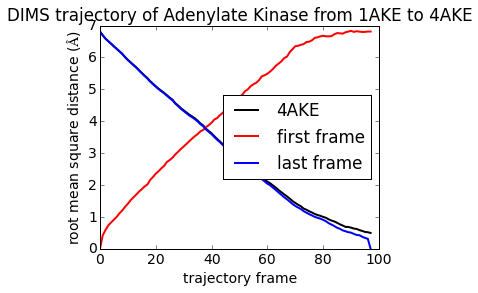

In [61]:
#!/usr/bin/env python
# Example script, part of MDAnalysis
"""
RMSD to a reference structure
=============================

Simple example implementation that shows how to calculate the RMSD
over a trajectory.

"""

import numpy
import MDAnalysis

import sys

from MDAnalysis.analysis.align import rmsd, qcp

def rmsd_traj(traj, ref, **kwargs):
    select = kwargs.pop('select', 'backbone')
    selections = kwargs.pop('selections', {'reference':select,'mobile':select})

    frames = traj.trajectory
    nframes = len(frames)
    rmsd = numpy.zeros((nframes,))

    ref_atoms = ref.selectAtoms(selections['reference'])
    traj_atoms = traj.selectAtoms(selections['mobile'])
    natoms = traj_atoms.numberOfAtoms()

    # if performing a mass-weighted alignment/rmsd calculation
    #masses = ref_atoms.masses()
    #weight = masses/numpy.mean(masses)

    # reference centre of mass system
    ref_com = ref_atoms.centerOfMass()
    ref_coordinates = ref_atoms.coordinates() - ref_com

    # allocate the array for selection atom coords
    traj_coordinates = traj_atoms.coordinates().copy()

    # R: rotation matrix that aligns r-r_com, x~-x~com
    #    (x~: selected coordinates, x: all coordinates)
    # Final transformed traj coordinates: x' = (x-x~_com)*R + ref_com
    for k,ts in enumerate(frames):
        # shift coordinates for rotation fitting
        # selection is updated with the time frame
        x_com = traj_atoms.centerOfMass()
        traj_coordinates[:] = traj_atoms.coordinates() - x_com

        ### NOTE: If you're only interested in RMSD and never in the
        ###       transformation matrix then set 'R = None' instead of
        ###       allocating an array.
        R = numpy.zeros((9,),dtype=numpy.float64)

        # Need to transpose coordinates such that the coordinate array is
        # 3xN instead of Nx3. Also qcp requires that the dtype be float64
        a = ref_coordinates.T.astype('float64')
        b = traj_coordinates.T.astype('float64')
        rmsd[k] = qcp.CalcRMSDRotationalMatrix(a,b,natoms,R,None)

        print "%5d  %8.3f A" % (k, rmsd[k])

        ### only comment in if you want to manipulate or write out
        ### the fitted trajectory
        ###
        ## R = numpy.matrix(R.reshape(3,3))
        ##
        ###  Transform each atom in the trajectory (use inplace ops to avoid copying arrays)
        ## ts._pos   -= x_com
        ## ts._pos[:] = ts._pos * R # R acts to the left & is broadcasted N times.
        ## ts._pos   += ref_com

    return rmsd

if __name__ == '__main__':
   from MDAnalysis import *
   from MDAnalysis.tests.datafiles import PSF, DCD, PDB_small
   ref = Universe(PSF, PDB_small)   # reference structure 4AKE
   trj = Universe(PSF, DCD)         # trajectory of change 1AKE->4AKE

   print "CA RMSD for %(DCD)r versus %(PDB_small)r" % vars()
   rmsds1 = rmsd_traj(trj, ref, select='name CA')

   print "CA RMSD for %(DCD)r versus first frame" % vars()
   ref = Universe(PSF, DCD)
   ref.trajectory[0]  # go to first frame
   rmsds2 = rmsd_traj(trj, ref, select='name CA')

   print "CA RMSD for %(DCD)r versus last frame" % vars()
   ref = Universe(PSF, DCD)
   ref.trajectory[-1]  # go to last frame
   rmsds3 = rmsd_traj(trj, ref, select='name CA')

   try:
       import matplotlib
       matplotlib.use('agg')  # fast windowless plotting
       from pylab import plot, xlabel, ylabel, legend, title, savefig
       plot(rmsds1, linewidth=2, color='black', label='4AKE')
       plot(rmsds2, linewidth=2, color='red', label='first frame')
       plot(rmsds3, linewidth=2, color='blue', label='last frame')

       xlabel('trajectory frame')
       ylabel(r'root mean square distance ($\mathrm{\AA}$)')
       title('DIMS trajectory of Adenylate Kinase from 1AKE to 4AKE')
       legend(loc='best')
       savefig("rmsd.pdf")
       savefig("rmsd.png")
       print "Wrote rmsd.{pdf,png}"
   except ImportError:
       print "No pylab/matplotlib, no graphs."

DEBUG:MDAnalysis.topology.PSF:PSF file '/Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysisTests/data/adk.psf': format 'STANDARD'
DEBUG:MDAnalysis.core.AtomGroup:Universe.load_new(): loading /Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysisTests/data/adk_dims.dcd...
DEBUG:MDAnalysis.topology.PSF:PSF file '/Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysisTests/data/adk.psf': format 'STANDARD'
DEBUG:MDAnalysis.core.AtomGroup:Universe.load_new(): loading /Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysisTests/data/adk_dims.dcd...
MDAnalysis.analysis.rmsd: INFO     RMS calculation for 855 atoms.
INFO:MDAnalysis.analysis.rmsd:RMS calculation for 855 atoms.
/Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysis/analysis/rms.py:439: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  natoms, rot, weight)
RMSD  6.82 A at frame    98/98  [100.0%]
MDAn

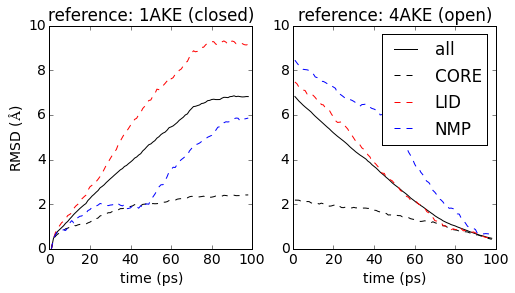

In [62]:
#!/usr/bin/env python
# Example script, part of MDAnalysis
"""
RMSD calculation for a group of atoms
=====================================

See docs for MDAnalysis.analysis.rms

"""

import MDAnalysis
from MDAnalysis.tests.datafiles import PSF,DCD,CRD

import MDAnalysis.analysis.rms

u = MDAnalysis.Universe(PSF,DCD)
ref1 = MDAnalysis.Universe(PSF,DCD)     # reference closed AdK (1AKE) (with the default ref_frame=0)



R1 = MDAnalysis.analysis.rms.RMSD(u, ref1,
           select="backbone",             # superimpose on whole backbone of the whole protein
           groupselections=["backbone and (resid 1-29 or resid 60-121 or resid 160-214)",   # CORE
                            "backbone and resid 122-159",                                   # LID
                            "backbone and resid 30-59"],                                    # NMP
           filename="rmsd_all_CORE_LID_NMP_ref1AKE.dat")
R1.run()
R1.save()

ref2 = MDAnalysis.Universe(PSF,CRD)    # reference open AdK (4AKE)
R2 = MDAnalysis.analysis.rms.RMSD(u, ref2,
           select="backbone",             # superimpose on whole backbone of the whole protein
           groupselections=["backbone and (resid 1-29 or resid 60-121 or resid 160-214)",   # CORE
                            "backbone and resid 122-159",                                   # LID
                            "backbone and resid 30-59"],                                    # NMP
           filename="rmsd_all_CORE_LID_NMP_ref4AKE.dat")
R2.run()
R2.save()

#-----------
# plotting
#-----------

import matplotlib.pyplot as plt
rmsd1 = R1.rmsd.T   # transpose makes it easier for plotting
rmsd2 = R2.rmsd.T   # transpose makes it easier for plotting
time = rmsd1[1]

fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(121)
ax1.plot(time, rmsd1[2], 'k-',  label="all")
ax1.plot(time, rmsd1[3], 'k--', label="CORE")
ax1.plot(time, rmsd1[4], 'r--', label="LID")
ax1.plot(time, rmsd1[5], 'b--', label="NMP")
#ax1.legend(loc="best")
ax1.set_xlabel("time (ps)")
ax1.set_ylabel(r"RMSD ($\AA$)")
ax1.set_title("reference: 1AKE (closed)")

ax2 = fig.add_subplot(122)
ax2.plot(time, rmsd2[2], 'k-',  label="all")
ax2.plot(time, rmsd2[3], 'k--', label="CORE")
ax2.plot(time, rmsd2[4], 'r--', label="LID")
ax2.plot(time, rmsd2[5], 'b--', label="NMP")
ax2.legend(loc="best")
ax2.set_xlabel("time (ps)")
#ax2.yaxis.set_visible(False)
ax2.set_ylim(ax1.get_ylim())
ax2.set_title("reference: 4AKE (open)")

fig.savefig("rmsd_all_CORE_LID_NMP.pdf")
fig.savefig("rmsd_all_CORE_LID_NMP.svg")
fig.savefig("rmsd_all_CORE_LID_NMP.png")

DEBUG:MDAnalysis.topology.PSF:PSF file '/Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysisTests/data/adk.psf': format 'STANDARD'
DEBUG:MDAnalysis.core.AtomGroup:Universe.load_new(): loading /Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysisTests/data/adk_open.pdb...
DEBUG:MDAnalysis.topology.PSF:PSF file '/Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysisTests/data/adk.psf': format 'STANDARD'
DEBUG:MDAnalysis.core.AtomGroup:Universe.load_new(): loading /Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysisTests/data/adk_dims.dcd...
MDAnalysis.analysis.align: INFO     RMS-fitting on 1656 atoms.
INFO:MDAnalysis.analysis.align:RMS-fitting on 1656 atoms.
/Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysis/analysis/align.py:475: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  natoms, rot, weight)
Fitted frame    98/98  [100.0%]
MDAnalysis.analys

Fitted trajectory: rmsfit.dcd
RMSD: rmsfit_rmsd.dat
RMSD graph: rmsdfit_rmsd.{pdf,png}


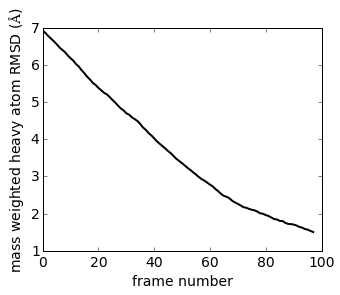

In [64]:
#!/usr/bin/env python
# Example script, part of MDAnalysis
"""
RMS-fit a trajectory to a reference structure
=============================================

Simple example implementation that shows how to fit by rms and access
the translated and rotated coordinates.

"""

import numpy
import MDAnalysis
from MDAnalysis.analysis.align import rms_fit_trj

if __name__ == '__main__':
    from MDAnalysis import Universe
    from MDAnalysis.tests.datafiles import PSF, DCD, PDB_small

    try:
        import matplotlib
        matplotlib.use('agg')
        from pylab import plot, xlabel, ylabel, savefig
        have_matplotlib = True
    except:
        have_matplotlib = False

    ref = Universe(PSF, PDB_small)   # reference structure 4AKE
    trj = Universe(PSF, DCD)         # trajectory of change 1AKE->4AKE

    rms_fit_trj(trj, ref, filename="rmsfit.dcd", select="not name H*",
                mass_weighted=True, rmsdfile="rmsfit_rmsd.dat")
    print "Fitted trajectory: rmsfit.dcd"

    rmsd = numpy.loadtxt("rmsfit_rmsd.dat")
    print "RMSD: rmsfit_rmsd.dat"

    if have_matplotlib:
        plot(rmsd, 'k-', linewidth=2)
        xlabel("frame number")
        ylabel(r"mass weighted heavy atom RMSD ($\AA$)")
        savefig("rmsdfit_rmsd.pdf")
        savefig("rmsdfit_rmsd.png")
        print "RMSD graph: rmsdfit_rmsd.{pdf,png}"


DEBUG:MDAnalysis.topology.PSF:PSF file '/Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysisTests/data/adk.psf': format 'STANDARD'
DEBUG:MDAnalysis.core.AtomGroup:Universe.load_new(): loading /Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysisTests/data/adk_open.pdb...
DEBUG:MDAnalysis.topology.PSF:PSF file '/Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysisTests/data/adk.psf': format 'STANDARD'
DEBUG:MDAnalysis.core.AtomGroup:Universe.load_new(): loading /Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysisTests/data/adk_dims.dcd...


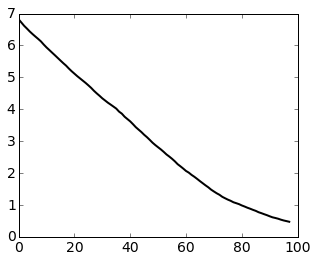

In [69]:
#!/usr/bin/env python
# Example script, part of MDAnalysis
"""
:Author:  Joshua Adelman
:Year:    2011
:License: BSD 3-clause

Example code to demonstrate aligning a trajectory to a reference file and
calculating the rmsd using PyQCPROT

Requires MDAnalysis http://code.google.com/p/mdanalysis

"""

import numpy
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PSF, DCD, PDB_small
import pyqcprot as qcp

ref = mda.Universe(PSF, PDB_small)   # reference structure 1AKE
traj = mda.Universe(PSF, DCD)         # trajectory of change 1AKE->4AKE

# align using the backbone atoms
select = 'backbone'
selections = {'reference':select,'target':select}

frames = traj.trajectory
nframes = len(frames)
rmsd2 = numpy.zeros((nframes,))

# Setup writer to write aligned dcd file
writer = mda.coordinates.DCD.DCDWriter(
    'rmsfit.dcd',frames.numatoms,
    frames.start_timestep,
    frames.skip_timestep,
    frames.delta,
    remarks='RMS fitted trajectory to ref')

ref_atoms = ref.selectAtoms(selections['reference'])
traj_atoms = traj.selectAtoms(selections['target'])
natoms = traj_atoms.numberOfAtoms()

# if performing a mass-weighted alignment/rmsd calculation
#masses = ref_atoms.masses()
#weight = masses/numpy.mean(masses)

# reference centre of mass system
ref_com = ref_atoms.centerOfMass()
ref_coordinates = ref_atoms.coordinates() - ref_com

# allocate the array for selection atom coords
traj_coordinates = traj_atoms.coordinates().copy()

# R: rotation matrix that aligns r-r_com, x~-x~com  
#    (x~: selected coordinates, x: all coordinates)
# Final transformed traj coordinates: x' = (x-x~_com)*R + ref_com
for k,ts in enumerate(frames):
    # shift coordinates for rotation fitting
    # selection is updated with the time frame
    x_com = traj_atoms.centerOfMass()
    traj_coordinates[:] = traj_atoms.coordinates() - x_com
    R = numpy.zeros((9,),dtype=numpy.float64)
    # Need to transpose coordinates such that the coordinate array is
    # 3xN instead of Nx3. Also qcp requires that the dtype be float64
    a = ref_coordinates.T.astype('float64')
    b = traj_coordinates.T.astype('float64')    
    rmsd2[k] = qcp.CalcRMSDRotationalMatrix(a,b,natoms,R,None)
   
    R = numpy.matrix(R.reshape(3,3))
   
    # Transform each atom in the trajectory (use inplace ops to avoid copying arrays)
    ts._pos   -= x_com
    ts._pos[:] = ts._pos * R # R acts to the left & is broadcasted N times.
    ts._pos   += ref_com
    writer.write(traj.atoms) # write whole input trajectory system

numpy.savetxt('rmsd.out',rmsd2)

plot(rmsd2, 'k-', linewidth=2)

In [70]:
import numpy
from MDAnalysis import *
from pylab import *

universe = Universe(...)

group = universe.selectAtoms("resname DMPC and ( name N or name P )")

skip = 5 # probably don't have enough memory to load the entire trajectory
data = universe.dcd.timeseries(group, skip=skip, format="afc")

# The data is structured as (N*2,numframes,3), where N is the number of lipids
# since you are pulling out the coordinates of the phosphate and nitrogen for each lipid
# v will contain the vector connecting each phosphate and nitrogen of the headgroup
v = numpy.subtract(data[0::2],data[1::2])
len_v = numpy.sqrt(numpy.add.reduce(numpy.power(v,2),axis=-1))
# Normalize v
v /= len_v[...,numpy.newaxis]
# this is only necessary if you have a lot of lipids and/or a lot of frames - it never hurts to free up memory
del len_v

lagtime = numpy.arange(1, len(data[0])/2+1)
C_t = numpy.array([numpy.average(1.5*numpy.power(numpy.add.reduce(v[:,:-lag]*v[:,lag:], axis=-1),2)-0.5) for lag in lagtime])

plot(C_t)

SyntaxError: invalid syntax (<ipython-input-70-711531de1a61>, line 5)

In [76]:
from MDAnalysis import *
#import Numeric
import numpy
from numpy import *
from numpy import linalg

from MDAnalysis.tests.datafiles import PSF, DCD

system = Universe(PSF, DCD)
asel = system.selectAtoms(' ( name CA ) ')
#print asel

#---------------------------------
#  making the mass matrix
#---------------------------------
kg = asel.masses()*(1.6605388e-27)
masses = numpy.repeat(kg, 3)
mass_matrix = numpy.identity(len(masses))*masses

#--------------------------------
#  Preparing to read the CA position at every 5 steps in the traj
#--------------------------------
skip = 5
num_ts = system.dcd.numframes/skip
num_coor = len(asel)*3
ca_pos = system.dcd.timeseries(asel, skip=skip, format='fac')

#---------------------------------
# converting angstroms to meters and merging the xyz of timeseries
#---------------------------------
ca = (1e-10)*(Numeric.reshape(ca_pos, (num_ts, -1)))
#print "ca", shape(ca)

#---------------------------------
#  making the covariance matrix
#---------------------------------
ca_avg = Numeric.average(ca)
#print "ca_av", shape(ca_avg)
ca2 = ca - ca_avg[Numeric.NewAxis,:]
#print "ca2", shape(ca2)
ca_cov = Numeric.zeros((num_coor, num_coor), Numeric.Float)
for ts in ca2:
    ca_cov += Numeric.outerproduct(ts, ts)
ca_cov /= num_ts
print "ca_cov", shape(ca_cov)
print "mass_matrix", shape(mass_matrix)

#---------------------------------
#  calculating the entropy
#---------------------------------
hplanck_bar = 6.6260755e-34/(2*Numeric.pi) # J*s
k = (1.380658e-23)        # J/K
Avogadro = 6.0221367e23   # /mol
T = 300                   # Kelvin
term = (k*T*exp(2)/pow(hplanck_bar,2))
print "term =", term
determ = linalg.det((term*Numeric.matrixmultiply(ca_cov,mass_matrix))+identity(len(mass_matrix)))
print "det = ", determ
S_ho = k/2*Avogadro*math.log(determ)
print "S_ho=", S_ho

DEBUG:MDAnalysis.topology.PSF:PSF file '/Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysisTests/data/adk.psf': format 'STANDARD'
DEBUG:MDAnalysis.core.AtomGroup:Universe.load_new(): loading /Users/alsalas/.virtualenvs/bio/lib/python2.7/site-packages/MDAnalysisTests/data/adk_dims.dcd...


AttributeError: 'Universe' object has no attribute 'dcd'